# Hands-on session: Machine Learning & Data Visualization
---
## 5 - Data Visualization
---


How do I use this?

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sina-mansour/OHBM-Brainhack-2021/blob/main/notebooks/05_data_visualization.ipynb) | [![View the notebook](https://img.shields.io/badge/render-nbviewer-orange.svg)](https://nbviewer.jupyter.org/github/sina-mansour/OHBM-Brainhack-2021/blob/main/notebooks/05_data_visualization.ipynb?flush_cache=true)

---

package installation for google colab:

In [ ]:
# install required packages for colab
!wget "https://raw.githubusercontent.com/sina-mansour/OHBM-Brainhack-2021/main/colab/requirements.txt" && pip install -r requirements.txt


---

Loading packages

In [1]:
# pandas for data handling
import pandas as pd

# matplotlib and seaborn for data visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# setup inline plotting for jupyter
%matplotlib inline

# numpy for mathematical operations of data
import numpy as np

# nilearn and nibabel for handling neuroimaging data
import nilearn.datasets as nidata
import nilearn.plotting as niplot
import nibabel as nib

# sklearn is python's base of operations for everything ML
import sklearn

# statsmodels is more of an statistical inference toolbox for python
import statsmodels



In this section we'll briefly go over some basic, but very useful plotting methods avialable in python.

We'll be mainly using methods from `matplotlib`, `seaborn`, and `nilearn.plotting`.

**`matplotlib`** is python's core package for plotting. It gives us the ability to create and manipulate the structure of figures.

**`seaborn`** is an extension plotting package which provides beutified plots, styles, and a collection of advanced plotting abillities.

**`nilearn.plotting`** is a neuroimaging visualization packages which enables drawing of brain images and project data over brain images both in volume and surface.

## Plotting structure

A `Figure` object is the outermost container for a matplotlib graphic, which can contain multiple `Axes` objects. One source of confusion is the name: an `Axes` actually translates into what we think of as an individual plot or graph (rather than the plural of “axis,” as we might expect).

You can think of the `Figure` object as a box-like container holding one or more `Axes` (actual plots). Below the `Axes` in the hierarchy are smaller objects such as tick marks, individual lines, legends, and text boxes. Almost every “element” of a chart is its own manipulable Python object, all the way down to the ticks and labels:


<img src="https://files.realpython.com/media/fig_map.bc8c7cabd823.png" width="700">
    
Image from <a href="https://realpython.com/python-matplotlib-guide/">https://realpython.com/python-matplotlib-guide/</a>


We'll be using this  object hierarchical structure to build and manipulate the visualizations. 

Alright, now that we know a little bit about plot structures, let's start plotting some data. We'll use both the abide data and the trained model, as well as some simulated data for the visualizations.

In [2]:
# load the data from file
data = pd.read_csv('https://raw.githubusercontent.com/sina-mansour/OHBM-Brainhack-2021/main/data/abide2.tsv', sep='\t')

# The filter() method allows us to select variables by name--
# in this case, we put all features that match 'fs' in X_all.
X_all = data.filter(like='fs')

# for the sake of simplicity we'll only use a portion of the whole feature set
N_FEATURES = 20

# pandas DFs have a helpful sample() method for sampling rows/columns
X_sample = X_all.sample(N_FEATURES, axis=1, random_state=100)

# Split feature set with a fixed random seed for reproducibility
X_sample_train, X_sample_test = sklearn.model_selection.train_test_split(X_sample, test_size=200, random_state=123)
X_all_train, X_all_test = sklearn.model_selection.train_test_split(X_all, test_size=200, random_state=123)

# Split the demographic information
age = data['age']
sex = data['sex']
group = data['group']
age_train, age_test = sklearn.model_selection.train_test_split(age, test_size=200, random_state=123)
sex_train, sex_test = sklearn.model_selection.train_test_split(sex, test_size=200, random_state=123)
group_train, group_test = sklearn.model_selection.train_test_split(group, test_size=200, random_state=123)

# data standardization
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler().fit(X_sample_train)
X_sample_train_scaled = standard_scaler.transform(X_sample_train)

# SVR with rbf kernel trained and tuned via grid search
from sklearn.model_selection import GridSearchCV
# svr parameter space for tuning
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1, 1, 10, 100],}
# SVR with gridsearch
svr = sklearn.svm.SVR()
gridsearch_svr = GridSearchCV(svr, parameters, cv=5)
gridsearch_svr.fit(X_sample_train_scaled, age_train)
age_test_predicted_gridsearch_svr_scaled = gridsearch_svr.predict(standard_scaler.transform(X_sample_test))

# report evaluation of RMSE
from sklearn.metrics import mean_squared_error
print('Performance evaluation:')
print('RMSE of the svr model after gridsearch (train)', mean_squared_error(age_train, gridsearch_svr.predict(X_sample_train_scaled), squared=False))
print('RMSE of the svr model after gridsearch (test)', mean_squared_error(age_test, age_test_predicted_gridsearch_svr_scaled, squared=False))



Performance evaluation:
RMSE of the svr model after gridsearch (train) 5.411074697484849
RMSE of the svr model after gridsearch (test) 5.9930029416360515


---

## Scatter plots

We could use both matplotlib and seaborn for scatter plots. Let's try plotting the predicted brain age vs. true age on a scatter plot. We'll first give it a shot with matplotlib, and then see how seaborn can be used to enhance the initial scatter.


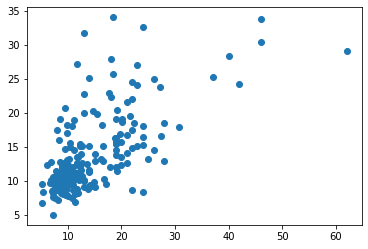

In [3]:
# let's define the x and y of the points
x = age_test
y = age_test_predicted_gridsearch_svr_scaled

plt.scatter(x, y)


### Figure structure

Now let's try diving deeper to the figure structure explained to modify some bits and pieces:

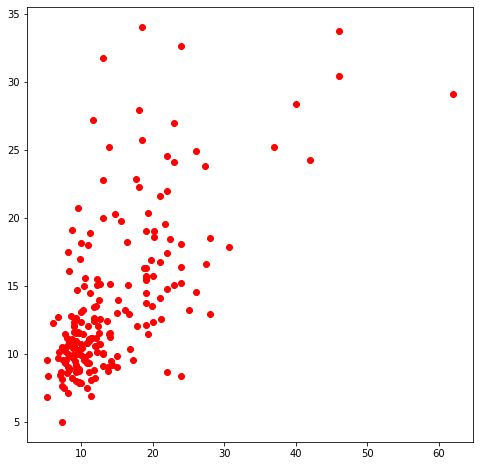

In [4]:
# create a figure with a predetermined size
fig, axes = plt.subplots(figsize=(8, 8))

# use the axes object to plot on the figure
axes.scatter(x, y, c='r')


Now we could add further modifications to make a title and add labels to the axes:

Text(0, 0.5, 'predicted age')

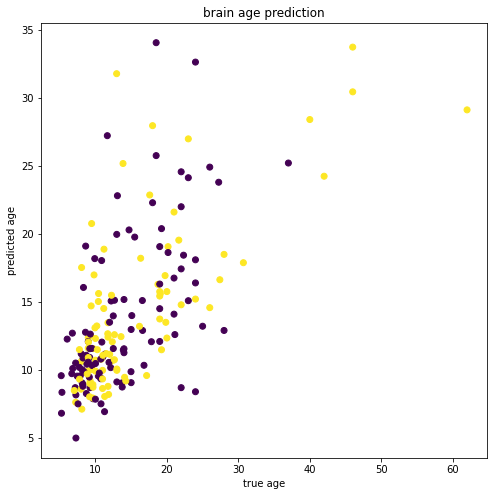

In [5]:
# create a figure with a predetermined size
fig, axes = plt.subplots(figsize=(8, 8))

# use the axes object to plot on the figure
axes.scatter(x, y, c=group_test)

# make title
axes.set_title('brain age prediction')

# make x and y labels
axes.set_xlabel('true age')
axes.set_ylabel('predicted age')


Now as mentioned earlier, seaborn can be used to further beutify the plot. Here's an example:

In [6]:
# first lets make the group labels categorical
cat_group = group.copy()
cat_group = cat_group.replace({1:'Autism', 2: 'Control'})

cat_group_train, cat_group_test = sklearn.model_selection.train_test_split(cat_group, test_size=200, random_state=123)

Text(0, 0.5, 'predicted age')

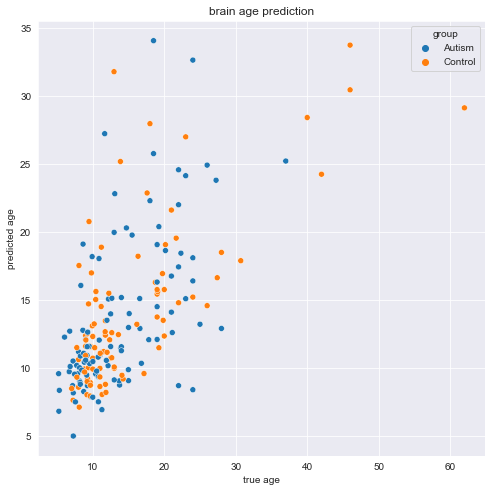

In [7]:
# add some styling
sns.set_style('darkgrid')

# create a figure with a predetermined size
fig, axes = plt.subplots(figsize=(8, 8))

# use seaborn's scatter plot instead
sns.scatterplot(x=x, y=y, hue=cat_group_test, ax=axes, )

# make title
axes.set_title('brain age prediction')

# make x and y labels
axes.set_xlabel('true age')
axes.set_ylabel('predicted age')


---
## Line plots

Line plots are usually used to plot y as a function of x.

The example bellow is plotting sin(x):

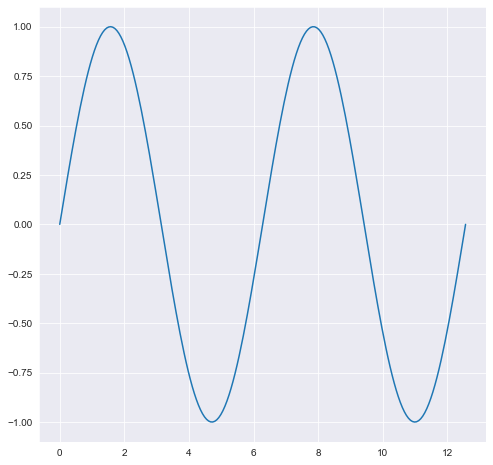

In [8]:
# add some styling note this is also applied to matplotlib generated plots!
sns.set_style('darkgrid')

# create a figure with a predetermined size
fig, axes = plt.subplots(figsize=(8, 8))

# define a set of predefined points alon the x axis
X=np.linspace(0,4*np.pi, 200)

# define y as a function of x
Y=np.sin(X)

# create a simple line plot with matplotlib
axes.plot(X, Y)


We could further strech this idea to use as a basis for presentation of data distribution:

<AxesSubplot:xlabel='age'>

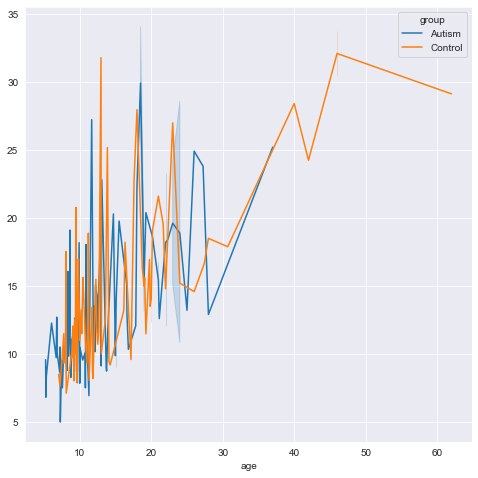

In [9]:
# add some styling note this is also applied to matplotlib generated plots!
sns.set_style('darkgrid')

# create a figure with a predetermined size
fig, axes = plt.subplots(figsize=(8, 8))

# create line plot with seaborn
sns.lineplot(x=x, y=y, ax=axes, hue=cat_group_test)


Ooops! that's not what we intended to see! we need to create bins along the x axis to better represent the mean:

<AxesSubplot:xlabel='age'>

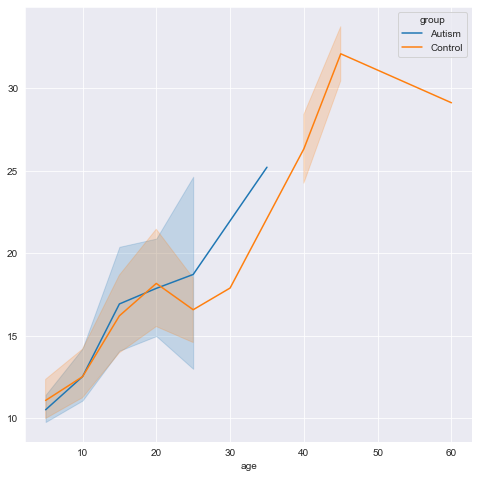

In [10]:
# add some styling note this is also applied to matplotlib generated plots!
sns.set_style('darkgrid')

# create a figure with a predetermined size
fig, axes = plt.subplots(figsize=(8, 8))

# create line plot with seaborn
sns.lineplot(x=5*(x//5), y=y, hue=cat_group_test, ax=axes)


Ok, this is now looking better, Let's overlay it on the scatter in a single plot and color by group! This is going to be really simple, you just combine the codes for scatter and line plot, and python will take care of the rest:

<AxesSubplot:xlabel='age'>

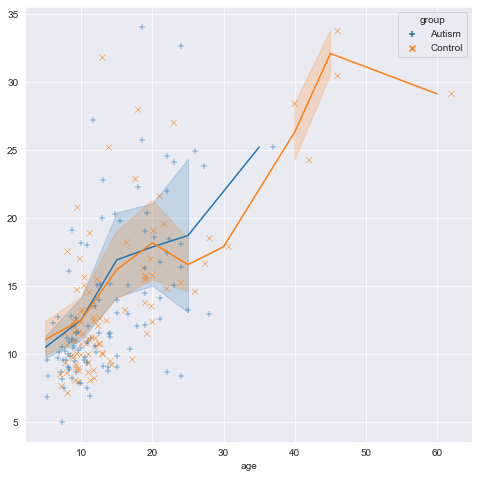

In [11]:
# add some styling
sns.set_style('darkgrid')

# create a figure with a predetermined size
fig, axes = plt.subplots(figsize=(8, 8))

# create line plot with seaborn
sns.lineplot(x=5*(x//5), y=y, hue=cat_group_test, ax=axes, legend=False)

# use seaborn's scatter plot
sns.scatterplot(x=x, y=y, hue=cat_group_test, ax=axes, style=cat_group_test, markers=['+','x'])


But we could use seaborn's built in functions to get more useful plots with less hassle: Here, we use the regplot function which not only plots a scatter, it also draws a regression line with confidence intervals.

<AxesSubplot:xlabel='age'>

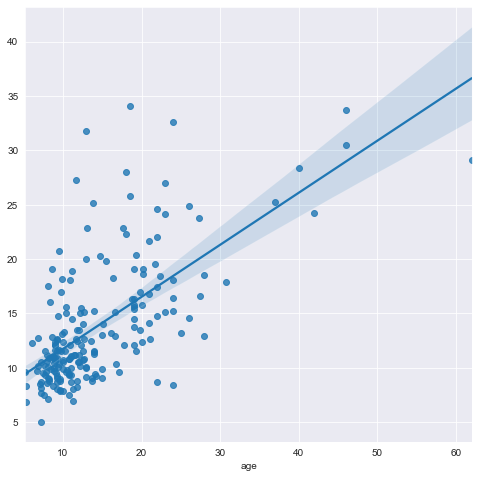

In [12]:
# add some styling
sns.set_style('darkgrid')

# create a figure with a predetermined size
fig, axes = plt.subplots(figsize=(8, 8))

# create line plot with seaborn
sns.regplot(x=x, y=y, ax=axes,)


regplot can also be used to fit higher order polynomials

<AxesSubplot:>

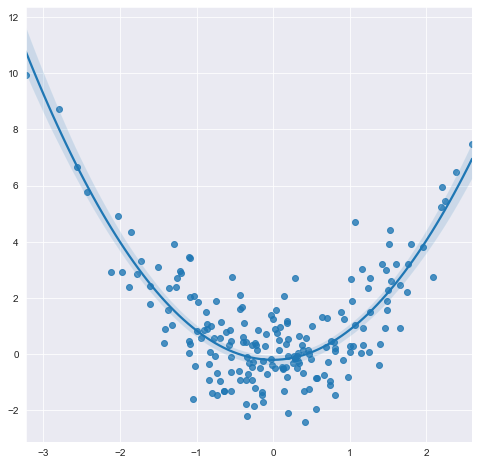

In [13]:
# add some styling
sns.set_style('darkgrid')

# create a figure with a predetermined size
fig, axes = plt.subplots(figsize=(8, 8))

# define random seed for reproducibility
np.random.seed(123)

# define x and error points along a normal distribution
X=np.random.normal(size=200)
E=np.random.normal(size=200)*1.2

# define y as a function of x
Y = X**2 + E

# create line plot with seaborn
sns.regplot(x=X, y=Y, ax=axes, order=2)


---
## Histograms

Histograms are another visualization method that are used to indicate the distribution of a sample.

For instance, in the next plot we'll use histograms to plot the distribution of age across the abide sample.

Text(0, 0.5, 'count')

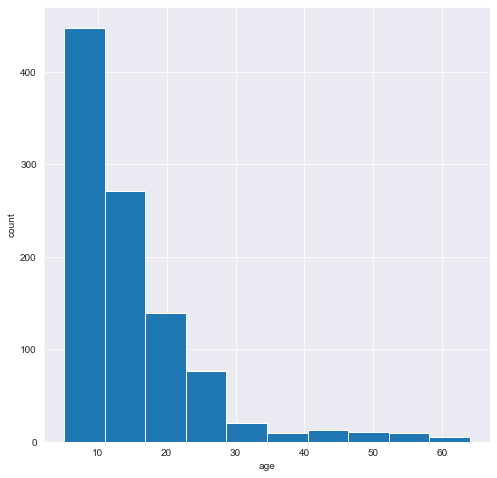

In [14]:
# add some styling
sns.set_style('darkgrid')

# create a figure with a predetermined size
fig, axes = plt.subplots(figsize=(8, 8))

# plot a histogram of distribution
axes.hist(age);

# make x and y labels
axes.set_xlabel('age')
axes.set_ylabel('count')


Again, we could use seaborn to have an enhanced version of a histogram:

Text(0, 0.5, 'count')

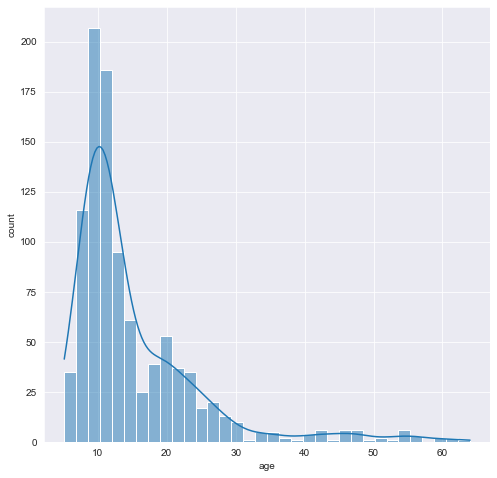

In [15]:
# add some styling
sns.set_style('darkgrid')

# create a figure with a predetermined size
fig, axes = plt.subplots(figsize=(8, 8))

# plot a histogram of distribution
sns.histplot(age, ax=axes, kde=True)

# make x and y labels
axes.set_xlabel('age')
axes.set_ylabel('count')


---
## Subplots and overlays

As we saw earlier we could have multiple subplots in a plot. This way a single `Figure` contains multiple `Axes` objects:

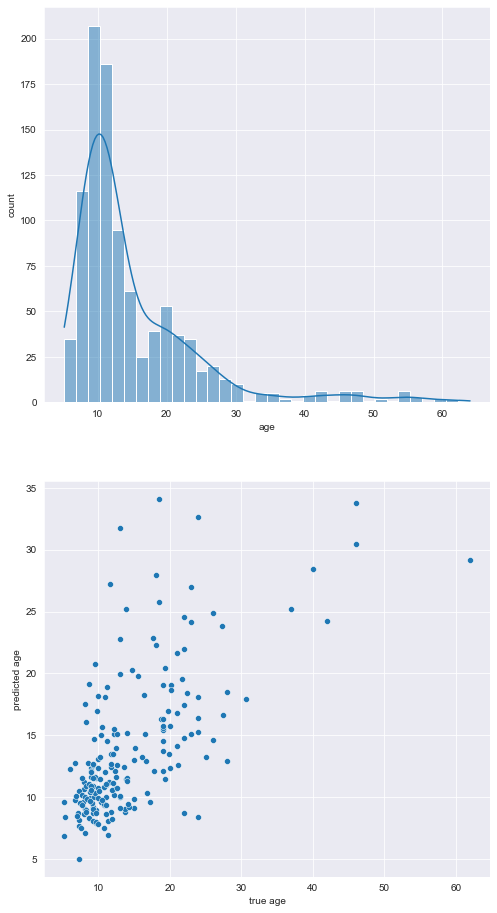

In [16]:
# add some styling
sns.set_style('darkgrid')

# create a figure with a predetermined size
fig, axes = plt.subplots(nrows=2, figsize=(8, 16),)

# plot a histogram of distribution
sns.histplot(age, ax=axes[0], kde=True)

# make x and y labels
axes[0].set_xlabel('age')
axes[0].set_ylabel('count')

# use seaborn's scatter plot instead
sns.scatterplot(x=x, y=y, ax=axes[1], )

# make x and y labels
axes[1].set_xlabel('true age')
axes[1].set_ylabel('predicted age');


These were only a few examples of how `matplotlib` and seaborn could be used for data visualization. However, there are many different types of plots that could come in handy in different scenarios. So the best would be to finish this section with a reference to sample visualizations from existing package galleries:

So if you like to find out about the many different visualizations you could use with your data, make sure to have a look at the following resources for inspiration:

- [The seaborn gallery of examplest](https://seaborn.pydata.org/examples/index.html)

- [The python graph gallery](https://www.python-graph-gallery.com/)

- remember that matplotlib and seaborn are just a couple of frequently used libraries, but the visualization you're looking for may be implemented in a [different library](https://mode.com/blog/python-data-visualization-libraries/)

---
## Neuroimaging visualizations

Having seen a few different general data visualization methods. It'd be great to conclude this session with a few neuroimaging specific plotting functions.

`nilearn.plotting` has a multitude of methods to visualize brain data on volumetric and surface plots. You cen check here for [the list of methods](https://nilearn.github.io/plotting/index.html).

But we'll only provide a couple of examples:

A sample visualization of a cortical surface parcellation on a group average inflated surface:

In [ ]:
!wget "https://raw.githubusercontent.com/sina-mansour/OHBM-Brainhack-2021/main/data/left_inflated.surf.gii"
!wget "https://raw.githubusercontent.com/sina-mansour/OHBM-Brainhack-2021/main/data/left_HCP_MMP1.label.gii"

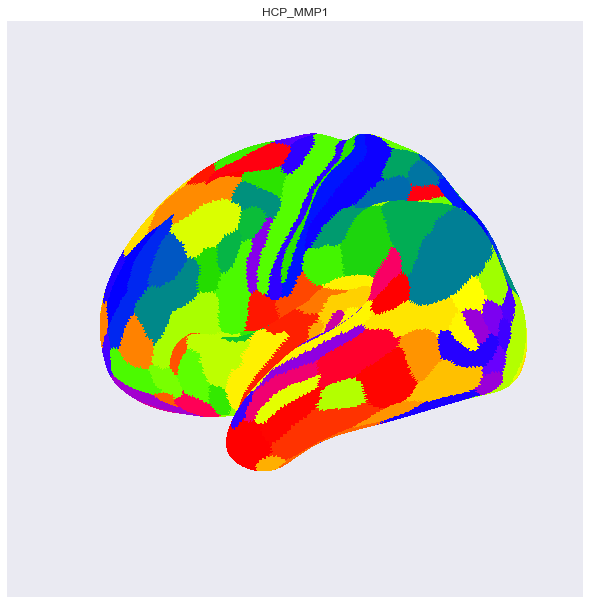

In [17]:
fig = plt.figure(figsize=(12, 8))
out = niplot.plot_surf_roi("left_inflated.surf.gii", "left_HCP_MMP1.label.gii", cmap='prism', figure=fig, title="HCP_MMP1")

In [18]:
view = niplot.view_surf("left_inflated.surf.gii", "left_HCP_MMP1.label.gii", cmap='prism', symmetric_cmap=False)

view.open_in_browser()


In [19]:
img = nidata.fetch_localizer_button_task()['tmap']     
view = niplot.view_img_on_surf(img, threshold='90%', surf_mesh='fsaverage')
view.open_in_browser()

/home/sina/.local/lib/python3.8/site-packages/numpy/lib/npyio.py:2405: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [20]:
from nilearn import plotting, datasets     
img = datasets.fetch_localizer_button_task()['tmap']     
html_view = plotting.view_img(img, threshold=2, vmax=4, cut_coords=[-42, -16, 52],
                                    title="Motor contrast")   
html_view.open_in_browser()

/home/sina/.local/lib/python3.8/site-packages/numpy/lib/npyio.py:2405: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)
